<a href="https://colab.research.google.com/github/tariqzia5/Machine-Learning-P2/blob/main/1D_Default_of_credit_card_clients_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

Data Link : https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset






# **Dataset Information**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.




# **Content**

There are 25 variables:

ID: ID of each client LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit SEX: Gender (1=male, 2=female) EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) MARRIAGE: Marital status (1=married, 2=single, 3=others) AGE: Age in years PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) PAY_2: Repayment status in August, 2005 (scale same as above) PAY_3: Repayment status in July, 2005 (scale same as above) PAY_4: Repayment status in June, 2005 (scale same as above) PAY_5: Repayment status in May, 2005 (scale same as above) PAY_6: Repayment status in April, 2005 (scale same as above) BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) default.payment.next.month: Default payment (1=yes, 0=no)





## **Inspiration**

Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables? Which variables are the strongest predictors of default payment?









# **Project Objective**


**Background Goal:-**

To determine the important factors or variables are the strongest predictors of default payment and that can influence the chance of credit card default.
The probabilities of default on a payment that are affected by a variety of demographic factors.

**Number of Resources:-5**

**Business Impact:-**

Predict the chance of the bank's customers defaulting on their credit cards in the future month.
Build a strategy to convert bad customer to good customer.
Loss Provisioning

**Time Taken:-**

Data exploration-1 day
Data Cleaning and Preparation-1 day
Model Building and Validation-1 day



In [1]:
# Importing Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import output
output.clear()

In [3]:
# Importing dataset
cred_data=pd.read_csv('https://raw.githubusercontent.com/tariqzia5/Python_P/main/UCI_Credit_Card.csv')

In [4]:
cred_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
cred_data.shape

(30000, 25)

In [6]:
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
#@title
# Checking for null values in any columns
cred_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# **Categorical Variable Exploration**

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


<Axes: xlabel='count', ylabel='EDUCATION'>

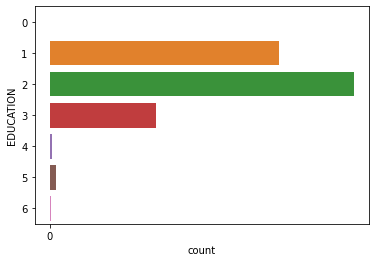

In [10]:
# Category 0,5,6 are undocumented so needed to be checked
print(cred_data['EDUCATION'].value_counts())
sns.countplot(cred_data['EDUCATION'])
sns.countplot(y="EDUCATION",  data=cred_data)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


<Axes: ylabel='count'>

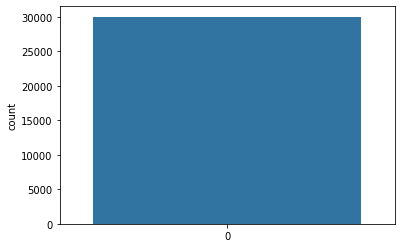

In [11]:
# Category 0 is undocumented to be checked
print(cred_data['MARRIAGE'].value_counts())
sns.countplot(cred_data['MARRIAGE'])

<Axes: xlabel='count', ylabel='MARRIAGE'>

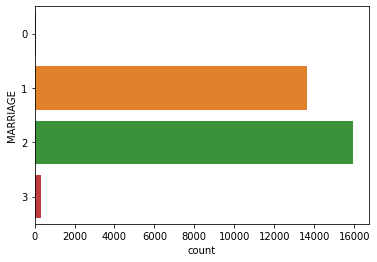

In [13]:
sns.countplot(y="MARRIAGE",  data=cred_data)

In [14]:
# Some of the age values are more than 70 which is fine.
cred_data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [15]:
cred_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [16]:
# All the pay are having -2,0 category that are undocumented.
# Given category -1 as pay duly(properly paid on time)
# So -2,0,-1 can be treated as one category. to be checked
print(cred_data['PAY_0'].value_counts())
print(cred_data['PAY_2'].value_counts())

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


## **Continous Variable Exploration**

In [17]:
# BILL_AMT1 having 1% of negative values
# BILL_AMT2 TO BILL_AMT6 having 2% negative values
# can be treated as extra paid

# Looks like Bill amount has 1% of outliers - to be cleaned
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].quantile([0,0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.09,0.1,
0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.01,-81.00,-200.00,-200.00,-212.02,-232.01,-331.03
0.02,0.00,-4.00,-3.00,-3.02,-3.02,-6.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.06,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,131.82,0.00,0.00,0.00,0.00,0.00
0.10,278.90,0.00,0.00,0.00,0.00,0.00


<Axes: >

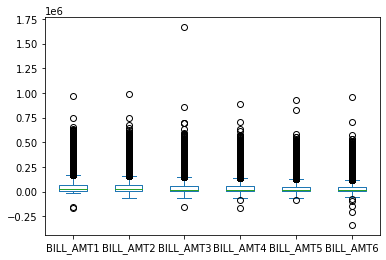

In [18]:
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

In [19]:
# Pay amount has 1% of extreme outlier needed to be cleaned
cred_data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.10,0.00,0.00,0.00,0.00,0.00,0.00
0.20,316.00,268.80,2.80,0.00,0.00,0.00
0.30,1263.70,1165.00,780.00,500.00,500.00,426.00
0.40,1724.00,1600.00,1206.00,1000.00,1000.00,1000.00
0.50,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
0.60,3000.00,3000.00,2500.00,2100.00,2123.40,2100.00
0.70,4309.30,4045.30,3560.30,3200.00,3200.00,3200.00
0.80,6192.20,6000.00,5284.00,5000.00,5000.00,5000.00
0.90,10300.00,10401.10,10000.00,9570.60,9500.00,9600.00


<Axes: >

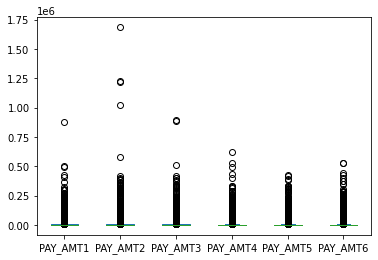

In [20]:
# Extreme Outliers have completely compressed the boxplot
cred_data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].plot(kind='box')

In [21]:
# Limit_Bal contains 1% of extreme outliers - require cleaning
cred_data['LIMIT_BAL'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

0.00      10000.0
0.10      30000.0
0.20      50000.0
0.30      70000.0
0.40     100000.0
0.50     140000.0
0.60     180000.0
0.70     210000.0
0.80     270000.0
0.90     360000.0
0.93     390000.0
0.94     410000.0
0.97     500000.0
0.99     500000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64

<Axes: ylabel='LIMIT_BAL'>

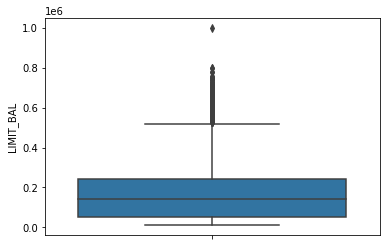

In [22]:
sns.boxplot(y=cred_data['LIMIT_BAL'])

## **Data Cleaning**

# **Cleaning Categorical Variables**

In [24]:
cross_tab_edu=pd.crosstab(cred_data["EDUCATION"],cred_data["default.payment.next.month"])
cross_tab_edu

default.payment.next.month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [25]:
cross_tab_edu_percentage=cross_tab_edu.apply(lambda x: x/x.sum(),axis=1)
round(cross_tab_edu_percentage,5)

default.payment.next.month,0,1
EDUCATION,,
0,1.00000,0.00000
1,0.80765,0.19235
2,0.76265,0.23735
3,0.74842,0.25158
4,0.94309,0.05691
5,0.93571,0.06429
6,0.84314,0.15686


In [26]:
# Simply Category 5,6,0 values are undocumented so we can pour it into category 4 metioned others.
unknown=(cred_data['EDUCATION']==5)|(cred_data['EDUCATION']==6)|(cred_data['EDUCATION']==0)
cred_data.loc[unknown,'EDUCATION']=4
cred_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [27]:
cross_tab_marriage=pd.crosstab(cred_data["MARRIAGE"],cred_data["default.payment.next.month"])
cross_tab_marriage

default.payment.next.month,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [28]:
cross_tab_marriage_per=cross_tab_marriage.apply(lambda x:x/x.sum(), axis=0)
round(cross_tab_marriage_per,4)

default.payment.next.month,0,1
MARRIAGE,,
0,0.0021,0.0008
1,0.4474,0.4831
2,0.5403,0.5035
3,0.0102,0.0127


In [29]:
# Category 0 value are undocumented so we can pour it into category 3 mentioned as others.
unknown=cred_data['MARRIAGE']==0
cred_data.loc[unknown,'MARRIAGE']=3
cred_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [31]:
# Frequency of each category
cred_data["PAY_0"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [32]:
#Cross tab with target
cross_cred_data2=pd.crosstab(cred_data['PAY_2'],cred_data['default.payment.next.month'])

In [33]:
#Cross tab row Percentages
cross_cred_data2_percent=cross_cred_data2.apply(lambda x: x/x.sum(), axis=1)
round(cross_cred_data2_percent,2)

default.payment.next.month,0,1
PAY_2,,
-2,0.82,0.18
-1,0.84,0.16
0,0.84,0.16
1,0.82,0.18
2,0.44,0.56
3,0.38,0.62
4,0.49,0.51
5,0.40,0.60
6,0.25,0.75


In [34]:
# Treating category -2,-1,0 value as one category 0 for pay duly 
# so going for imputation based on target variable values nearest to them.
fil = (cred_data.PAY_0 == -2) | (cred_data.PAY_0 == -1) | (cred_data.PAY_0 == 0)
cred_data.loc[fil, 'PAY_0'] = 0
fil = (cred_data.PAY_2 == -2) | (cred_data.PAY_2 == -1) | (cred_data.PAY_2 == 0)
cred_data.loc[fil, 'PAY_2'] = 0
fil = (cred_data.PAY_3 == -2) | (cred_data.PAY_3 == -1) | (cred_data.PAY_3 == 0)
cred_data.loc[fil, 'PAY_3'] = 0
fil = (cred_data.PAY_4 == -2) | (cred_data.PAY_4 == -1) | (cred_data.PAY_4 == 0)
cred_data.loc[fil, 'PAY_4'] = 0
fil = (cred_data.PAY_5 == -2) | (cred_data.PAY_5 == -1) | (cred_data.PAY_5 == 0)
cred_data.loc[fil, 'PAY_5'] = 0
fil = (cred_data.PAY_6 == -2) | (cred_data.PAY_6 == -1) | (cred_data.PAY_6 == 0)
cred_data.loc[fil, 'PAY_6'] = 0

In [37]:
# Renaming Pay_0 as pay_1 and default.payment.next as def_pay
cred_data.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAY'},inplace=True)
cred_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Cleaning Continous Variable

In [38]:
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].quantile([0,0.01,0.02,0.03,0.04,0.05,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.94,0.97,0.99,1])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
0.01,-81.00,-200.00,-200.00,-212.02,-232.01,-331.03
0.02,0.00,-4.00,-3.00,-3.02,-3.02,-6.00
0.03,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.00,0.00,0.00,0.00,0.00,0.00
0.05,0.00,0.00,0.00,0.00,0.00,0.00
0.08,0.00,0.00,0.00,0.00,0.00,0.00
0.09,131.82,0.00,0.00,0.00,0.00,0.00
0.10,278.90,0.00,0.00,0.00,0.00,0.00
0.20,1892.80,1472.80,1187.80,988.00,763.00,476.00


In [39]:
# Treating 1% positive outlier by imputation based on the median value of that column
cred_data.loc[cred_data['BILL_AMT1']>350110.68,'BILL_AMT1']=cred_data['BILL_AMT1'].median()
cred_data.loc[cred_data['BILL_AMT2']>337495.28,'BILL_AMT2']=cred_data['BILL_AMT2'].median()
cred_data.loc[cred_data['BILL_AMT3']>325030.39,'BILL_AMT3']=cred_data['BILL_AMT3'].median()
cred_data.loc[cred_data['BILL_AMT4']>304997.27,'BILL_AMT4']=cred_data['BILL_AMT4'].median()
cred_data.loc[cred_data['BILL_AMT5']>285868.33,'BILL_AMT5']=cred_data['BILL_AMT5'].median()
cred_data.loc[cred_data['BILL_AMT6']>279505.06,'BILL_AMT6']=cred_data['BILL_AMT6'].median()

<Axes: >

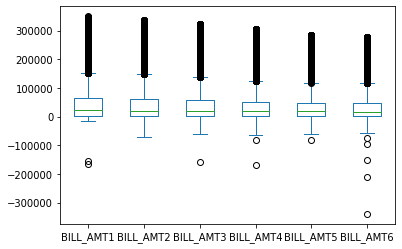

In [40]:
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

In [41]:
# Treating 1% negative outlier in BILL_AMT1 and 2% negative outlier in the rest BILL_AMT
# by imputation based on the median value of the negative values of the columns
cred_data.loc[cred_data['BILL_AMT1']<0,'BILL_AMT1']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT2']<0,'BILL_AMT2']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT3']<0,'BILL_AMT3']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT4']<0,'BILL_AMT4']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT5']<0,'BILL_AMT5']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()
cred_data.loc[cred_data['BILL_AMT6']<0,'BILL_AMT6']=cred_data['BILL_AMT1'][cred_data['BILL_AMT1']<0].median()

<Axes: >

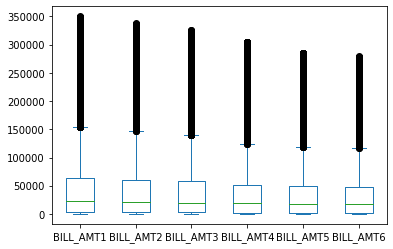

In [42]:
cred_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].plot(kind='box')

In [43]:
# Treating 1% extreme outlier by imputation based on the median value of that column
cred_data.loc[cred_data['PAY_AMT1']>67000,'PAY_AMT1']=cred_data['PAY_AMT1'].median()
cred_data.loc[cred_data['PAY_AMT2']>76700,'PAY_AMT2']=cred_data['PAY_AMT2'].median()
cred_data.loc[cred_data['PAY_AMT3']>70000,'PAY_AMT3']=cred_data['PAY_AMT3'].median()
cred_data.loc[cred_data['PAY_AMT4']>67100,'PAY_AMT4']=cred_data['PAY_AMT4'].median()
cred_data.loc[cred_data['PAY_AMT5']>65700,'PAY_AMT5']=cred_data['PAY_AMT5'].median()
cred_data.loc[cred_data['PAY_AMT6']>82700,'PAY_AMT6']=cred_data['PAY_AMT6'].median()

<Axes: >

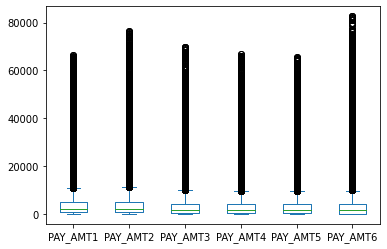

In [44]:
cred_data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].plot(kind='box')

In [45]:
# Treating 1% extreme outlier by imputation based on the median value of that column
cred_data.loc[cred_data['LIMIT_BAL']>500000,'LIMIT_BAL']=cred_data['LIMIT_BAL'].median()

<Axes: ylabel='LIMIT_BAL'>

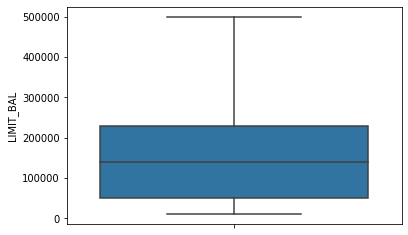

In [46]:
sns.boxplot(y=cred_data['LIMIT_BAL'])

In [47]:
# Copying the clean data for further analysis.
cred_data_new=cred_data.copy(deep=True)
cred_data_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Model Building-Logistic Regression

Select the right model, Include Feature Engineering, Perform Model Validation, Multiple models and performance comparison

The problem description and objective of this project, which is to determine the default or non-default of a credit card, make it clear that this is a classification problem, and therefore we can build a Logistic Regression Machine Learning Model.

## **Train Test Split**

In [48]:
# Creating X array that will contain features and y array will contain the target vector
X=cred_data_new.drop('DEF_PAY',axis=1)
y=cred_data_new['DEF_PAY']

# Importing the package
from sklearn.model_selection import train_test_split

# Using train_test_split() function to split the whole data to train data of 80% and test data of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Checking the shapes of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (24000, 24)
X_test (6000, 24)
y_train (24000,)
y_test (6000,)
